In [2]:
!pip install Vnstock --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 5.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vnstock import Vnstock
from sklearn.linear_model import LinearRegression
from datetime import timedelta

stock = Vnstock().stock()

2025-04-27 14:15:32 - vnstock.common.vnstock - INFO - Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
INFO:vnstock.common.vnstock:Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
2025-04-27 14:15:32 - vnstock.common.data.data_explorer - INFO - Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.
INFO:vnstock.common.data.data_explorer:Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df1=pd.read_csv('/content/drive/MyDrive/Barefoots/Vòng 2/Code/Main/PreTrain Data/FPT raw.csv')
df2= pd.read_csv('/content/drive/MyDrive/Barefoots/Vòng 2/Code/Main/PreTrain Data/CMC raw.csv')
df1.head()


,Date,Debt/Equity,Fixed Asset-To-Equity,Owners' Equity/Charter Capital,Fixed Asset Turnover,Days Inventory Outstanding,Days Payable Outstanding,Cash Cycle,Inventory Turnover,EBIT Margin (%),...,ADX_63_FPT,ADX_100_FPT,TRIX_mid_term21_FPT,TRIX_mid_term63_FPT,TRIX_long_term100_FPT,TSF_3_FPT,TSF_7_FPT,TSF_21_FPT,TSF_63_FPT,TSF_100_FPT
0,2017-08-24,1.308254,0.390988,0.825945,9.086943,52.127014,35.171836,131.337346,7.002128,0.079915,...,0.739749,0.271649,0.000133,0.000141,0.000212,14.560000,14.907143,14.992762,16.508233,18.414485
1,2017-08-25,1.308254,0.390988,0.825945,9.086943,52.127014,35.171836,131.337346,7.002128,0.079915,...,0.739749,0.271649,0.000133,0.000141,0.000212,14.560000,14.907143,14.992762,16.508233,18.414485
2,2017-08-28,1.308254,0.390988,0.825945,9.086943,52.127014,35.171836,131.337346,7.002128,0.079915,...,0.739749,0.271649,0.000133,0.000141,0.000212,14.560000,14.907143,14.992762,16.508233,18.414485
3,2017-08-29,1.308254,0.390988,0.825945,9.086943,52.127014,35.171836,131.337346,7.002128,0.079915,...,0.739749,0.271649,0.000133,0.000141,0.000212,14.560000,14.907143,14.992762,16.508233,18.414485
4,2017-08-30,1.308254,0.390988,0.825945,9.086943,52.127014,35.171836,131.337346,7.002128,0.079915,...,0.739749,0.271649,0.000133,0.000141,0.000212,14.676667,14.907143,14.992762,16.508233,18.414485


In [6]:
df2.shape

(1905, 164)

# Import Data

In [ ]:
#Dữ liệu thị trường chứng khoán của FPT, CMG, VNINDEX, VN30 từ 2018 đến nay
start = '2017-08-24'
end = '2025-04-08'
VNINDEX = Vnstock().stock(symbol='VNINDEX')
VN30 = Vnstock().stock(symbol='VN30')
FPT = Vnstock().stock(symbol='FPT')
CMC = Vnstock().stock(symbol ='CMG')

VNINDEX_stock = VNINDEX.quote.history(start=start, end=end, interval='1D')
VN30_stock = VN30.quote.history(start=start, end=end, interval='1D')
FPT_stock = FPT.quote.history(start=start, end=end, interval='1D')
CMC_stock = CMC.quote.history(start=start, end=end, interval='1D')

2025-04-23 15:53:25 - vnstock.common.data.data_explorer - INFO - Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.
INFO:vnstock.common.data.data_explorer:Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.
2025-04-23 15:53:26 - vnstock.common.data.data_explorer - INFO - Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.
INFO:vnstock.common.data.data_explorer:Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.


In [ ]:
CMC_stock.tail()

,time,open,high,low,close,volume
1900,2025-04-02,38.60,38.9,38.10,38.45,332200
1901,2025-04-03,35.80,37.8,35.80,35.80,903700
1902,2025-04-04,33.30,33.8,33.30,33.30,1840500
1903,2025-04-08,31.00,31.7,31.00,31.00,541200
1904,2025-04-09,28.85,29.6,28.85,28.85,1992100


In [ ]:
#Chỉ số trong BCTC từ đầu tới nay
FPT_ratio = FPT.finance.ratio(start=start, end=end)
CMC_ratio = CMC.finance.ratio(start=start, end=end)

In [ ]:
#Tên của các DataFrame để dùng về sau

      #Về thông số trên sàn chứng khoán: FPT_stock, CMG_stock, VNINDEX_stock, VN30_Stock

      #Về các chỉ số trong BCTC: FPT_ratio, CMC_ratio

# Data Preproccess

***Tên của các dataframe***

      - Về thông số trên sàn chứng khoán: FPT_stock, CMG_stock, VNINDEX_stock, VN30_Stock

      - Về bảng cân đối kế toán: FPT_balance_sheet

      - Về báo cáo kết quả hoạt động kinh doanh: FPT_financial_report, CMG_financial_report

      - Về báo cáo lưu chuyển tiền tệ: FPT_cash_flow, CMG_cash_flow

## **Phân tích Dữ liệu thị trường**

In [ ]:
#Phân tích kỹ thuật

def compute_technical_analysis(stock_data: pd.DataFrame, company_name: str):
    #3,7,21,63,100
    short_term3 = 3
    short_term7 = 7
    mid_term21 = 21
    mid_term63 = 63
    long_term100 = 100

    # Tính MA


    MA_short_term7 = stock_data['close'].rolling(window=short_term7).mean()
    MA_mid_term21 = stock_data['close'].rolling(window=mid_term21).mean()
    MA_mid_term63 = stock_data['close'].rolling(window=mid_term63).mean()
    MA_long_term100 = stock_data['close'].rolling(window=long_term100).mean()

    # Tính RSI
    def compute_RSI(data, window=14):
        delta = data.diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        avg_gain = gain.rolling(window=window, min_periods=window).mean()
        avg_loss = loss.rolling(window=window, min_periods=window).mean()
        rs = avg_gain / avg_loss
        rsi = 100 - (100 / (1 + rs))
        return rsi

    RSI_short_term3 = compute_RSI(stock_data['close'], window=short_term3)
    RSI_mid_term7 = compute_RSI(stock_data['close'], window=short_term7)
    RSI_mid_term21 = compute_RSI(stock_data['close'], window=mid_term21)
    RSI_mid_term63 = compute_RSI(stock_data['close'], window=mid_term63)
    RSI_long_term100 = compute_RSI(stock_data['close'], window=long_term100)


    # Tính EMA
    def compute_EMA(data, window):
        return data.ewm(span=window, adjust=False).mean()

    EMA_short_term3 = compute_EMA(stock_data['close'], short_term3)
    EMA_short_term7 = compute_EMA(stock_data['close'], short_term7)
    EMA_mid_term21 = compute_EMA(stock_data['close'], mid_term21)
    EMA_mid_term63 = compute_EMA(stock_data['close'], mid_term63)
    EMA_long_term100 = compute_EMA(stock_data['close'], long_term100)

    # Tính Bollinger Bands
    def compute_bollinger_bands(data, window=20):
        rolling_mean = data.rolling(window=window).mean()
        rolling_std = data.rolling(window=window).std()
        upper_band = rolling_mean + 2 * rolling_std
        lower_band = rolling_mean - 2 * rolling_std
        return pd.DataFrame({
            'Middle Band': rolling_mean,
            'Upper Band': upper_band,
            'Lower Band': lower_band
        })

    bollinger_bands = compute_bollinger_bands(stock_data['close'])

    # Tính OBV
    def compute_OBV(data):
        obv = [0]
        for i in range(1, len(data)):
            if data['close'][i] > data['close'][i - 1]:
                obv.append(obv[-1] + data['volume'][i])
            elif data['close'][i] < data['close'][i - 1]:
                obv.append(obv[-1] - data['volume'][i])
            else:
                obv.append(obv[-1])
        return pd.Series(obv, index=data.index)

    OBV = compute_OBV(stock_data)

    # Tính ATR
    def compute_ATR(data, window=14):
        high = data['high']
        low = data['low']
        close = data['close']
        tr1 = high - low
        tr2 = abs(high - close.shift())
        tr3 = abs(low - close.shift())
        tr = pd.DataFrame({'tr1': tr1, 'tr2': tr2, 'tr3': tr3}).max(axis=1)
        return tr.rolling(window=window).mean()

    ATR = compute_ATR(stock_data)

    # Tính MACD
    def compute_MACD(data, short_window=12, long_window=26, signal_window=9):
        ema_short = data['close'].ewm(span=short_window, adjust=False).mean()
        ema_long = data['close'].ewm(span=long_window, adjust=False).mean()
        macd_line = ema_short - ema_long
        signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
        histogram = macd_line - signal_line
        return pd.DataFrame({
            'MACD': macd_line,
            'Signal Line': signal_line,
            'Histogram': histogram
        }, index=data.index)


    MACD = compute_MACD(stock_data)

    #Tính TRIX
    def compute_trix(stock_data, period):
        # EMA cấp 1
          ema1 = stock_data['close'].ewm(span=period, adjust=False).mean()
        # EMA cấp 2
          ema2 = ema1.ewm(span=period, adjust=False).mean()
        # EMA cấp 3
          ema3 = ema2.ewm(span=period, adjust=False).mean()
          return ema3

    #Tính return day
    def compute_return(stock_data, period):
          return stock_data['close'].pct_change(period)
    return_day = compute_return(stock_data, 1)
    return_week = compute_return(stock_data, 7)
    return_month = compute_return(stock_data, 30)



    # Calculate volatility
    def compute_volatility(stock_data, period):
        if period == 1:
            return stock_data['close'].pct_change()
        return stock_data['close'].pct_change().rolling(window = period).std()
    volatility_day = compute_volatility(stock_data, 1)
    volatility_week = compute_volatility(stock_data, 7)
    volatility_month = compute_volatility(stock_data, 30)

    #Tính High-Close
    def compute_high_minus_close(stock_data):
        return stock_data['high'] - stock_data['close']
    high_minus_close = compute_high_minus_close(stock_data)

    #Tính low-open
    def compute_low_minus_open(stock_data):
        return stock_data['low'] - stock_data['open']
    low_minus_open = compute_low_minus_open(stock_data)

    #Tính cumulative return
    cumulative_return = (1 + stock_data['close'].pct_change()).cumprod()

    #SMA
    def compute_SMA(stock_data, window):
        return stock_data['close'].rolling(window=window).mean()
    SMA_3 = compute_SMA(stock_data, 3)
    SMA_7 = compute_SMA(stock_data, 7)
    SMA_21 = compute_SMA(stock_data, 21)
    SMA_63 = compute_SMA(stock_data, 63)
    SMA_100 = compute_SMA(stock_data, 100)

    #Tính return_day_std
    def compute_return_std(stock_data, period):
        if period == 1:
          return stock_data['close'].pct_change()
        return stock_data['close'].pct_change(period).rolling(window=period).std()
    return_day_std = compute_return_std(stock_data, 1)
    return_week_std = compute_return_std(stock_data, 7)
    return_month_std = compute_return_std(stock_data, 30)

    #Tính liquidity
    def compute_liquidity(stock_data, period):
        volume_mean = stock_data['volume'].rolling(window=period).mean()
        close_mean = stock_data['close'].rolling(window=period).mean()
        return volume_mean * close_mean

    liquidity_day = compute_liquidity(stock_data, 1)
    liquidity_week = compute_liquidity(stock_data, 7)
    liquidity_month = compute_liquidity(stock_data, 30)

    #Tính MFI
    def calculate_mfi(high, low, close, volume, period=14):
        """Calculates the Money Flow Index (MFI)."""
        typical_price = (high + low + close) / 3
        money_flow = typical_price * volume

        # Positive and negative money flow
        positive_mf = []
        negative_mf = []
        for i in range(1, len(typical_price)):
            if typical_price[i] > typical_price[i-1]:
                positive_mf.append(money_flow[i])
                negative_mf.append(0)
            elif typical_price[i] < typical_price[i-1]:
                positive_mf.append(0)
                negative_mf.append(money_flow[i])
            else:
                positive_mf.append(0)
                negative_mf.append(0)

        positive_mf = pd.Series(positive_mf)
        negative_mf = pd.Series(negative_mf)

        # Money Flow Ratio
        positive_mf_sum = positive_mf.rolling(window=period).sum()
        negative_mf_sum = negative_mf.rolling(window=period).sum()
        money_flow_ratio = positive_mf_sum / negative_mf_sum

        # Handle potential division by zero errors
        money_flow_ratio.fillna(1, inplace=True)  # Replace NaN with 1

        # MFI
        mfi = 100 - (100 / (1 + money_flow_ratio))
        return mfi

    stock_data['MFI_3'] = calculate_mfi(stock_data['high'], stock_data['low'], stock_data['close'], stock_data['volume'], period=3)
    stock_data['MFI_7'] = calculate_mfi(stock_data['high'], stock_data['low'], stock_data['close'], stock_data['volume'], period=7)
    stock_data['MFI_21'] = calculate_mfi(stock_data['high'], stock_data['low'], stock_data['close'], stock_data['volume'], period=21)
    stock_data['MFI_63'] = calculate_mfi(stock_data['high'], stock_data['low'], stock_data['close'], stock_data['volume'], period=63)
    stock_data['MFI_100'] = calculate_mfi(stock_data['high'], stock_data['low'], stock_data['close'], stock_data['volume'], period=100)

    #Tính momentum
    def compute_momentum(stock_data, period):
        return stock_data['close'].pct_change(period)

    stock_data['Momentum_3'] = compute_momentum(stock_data, 3)
    stock_data['Momentum_7'] = compute_momentum(stock_data, 7)
    stock_data['Momentum_21'] = compute_momentum(stock_data, 21)
    stock_data['Momentum_63'] = compute_momentum(stock_data, 63)
    stock_data['Momentum_100'] = compute_momentum(stock_data, 100)

    #Tính rocr
    def compute_rocr(stock_data, period):
        return stock_data['close'].pct_change(period) * 100

    stock_data['ROCR_3'] = compute_rocr(stock_data, 3)
    stock_data['ROCR_7'] = compute_rocr(stock_data, 7)
    stock_data['ROCR_21'] = compute_rocr(stock_data, 21)
    stock_data['ROCR_63'] = compute_rocr(stock_data, 63)
    stock_data['ROCR_100'] = compute_rocr(stock_data, 100)

    #Tính CCI
    def compute_cci(data, period=20):
        typical_price = (data['high'] + data['low'] + data['close']) / 3
        sma = typical_price.rolling(window=period).mean()
        mad = (typical_price - sma).abs().rolling(window=period).mean()
        cci = (typical_price - sma) / (0.015 * mad)
        return cci

    stock_data['CCI_3'] = compute_cci(stock_data, period=3)
    stock_data['CCI_7'] = compute_cci(stock_data, period=7)
    stock_data['CCI_21'] = compute_cci(stock_data, period=21)
    stock_data['CCI_63'] = compute_cci(stock_data, period=63)
    stock_data['CCI_100'] = compute_cci(stock_data, period=100)

    #Tính William_r
    def compute_williams_r(data, period):
        high = data['high']
        low = data['low']
        close = data['close']
        highest_high = high.rolling(window=period).max()
        lowest_low = low.rolling(window=period).min()
        williams_r = ((highest_high - close) / (highest_high - lowest_low)) * 100
        return williams_r

    stock_data['Williams_R_3'] = compute_williams_r(stock_data, 3)
    stock_data['Williams_R_7'] = compute_williams_r(stock_data, 7)
    stock_data['Williams_R_21'] = compute_williams_r(stock_data, 21)
    stock_data['Williams_R_63'] = compute_williams_r(stock_data, 63)
    stock_data['Williams_R_100'] = compute_williams_r(stock_data, 100)

    def compute_adx(high, low, close, period=14):

        tr1 = high - low
        tr2 = np.abs(high - close.shift(1))
        tr3 = np.abs(low - close.shift(1))
        tr = pd.DataFrame({'tr1': tr1, 'tr2': tr2, 'tr3': tr3}).max(axis=1)
        plus_dm = pd.Series(np.where(((high - high.shift(1)) > (low.shift(1) - low)) & ((high - high.shift(1)) > 0), high - high.shift(1), 0), index=high.index) # Convert to pandas Series
        minus_dm = pd.Series(np.where(((low.shift(1) - low) > (high - high.shift(1))) & ((low.shift(1) - low) > 0), low.shift(1) - low, 0), index=low.index) # Convert to pandas Series

        atr = tr.rolling(window=period).mean()

        plus_di = 100 * (plus_dm.rolling(window=period).sum() / atr)
        minus_di = 100 * (minus_dm.rolling(window=period).sum() / atr)

        dx = 100 * np.abs((plus_di - minus_di) / (plus_di + minus_di))

        dx = np.where(np.isnan(dx), 0, dx)
        dx = np.where(np.isinf(dx), 0, dx)

        dx = pd.Series(dx, index=high.index)

        adx = dx.rolling(window=period).mean()
        return pd.Series(adx, index=high.index)

    stock_data['ADX_3'] = compute_adx(stock_data['high'], stock_data['low'], stock_data['close'], period=3)
    stock_data['ADX_7'] = compute_adx(stock_data['high'], stock_data['low'], stock_data['close'], period=7)
    stock_data['ADX_21'] = compute_adx(stock_data['high'], stock_data['low'], stock_data['close'], period=21)
    stock_data['ADX_63'] = compute_adx(stock_data['high'], stock_data['low'], stock_data['close'], period=63)
    stock_data['ADX_100'] = compute_adx(stock_data['high'], stock_data['low'], stock_data['close'], period=100)

    #Tính trix
    def compute_trix(stock_data, period):
        ema1 = stock_data['close'].ewm(span=period, adjust = False).mean()
        ema2 = ema1.ewm(span=period, adjust = False).mean()
        ema3 = ema2.ewm(span=period, adjust = False).mean()
        trix = (ema3 - ema3.shift(period)) / (ema3.shift(period) * period)
        return trix

    TRIX_short_term3 = compute_trix(stock_data, 3)
    TRIX_short_term7 = compute_trix(stock_data, 7)
    TRIX_mid_term21 = compute_trix(stock_data, 21)
    TRIX_mid_term63 = compute_trix(stock_data, 63)
    TRIX_long_term100 = compute_trix(stock_data, 100)

    #Compute TSF
    def calculate_tsf(stock_data, period):
        if len(stock_data) < period:
            return None

        close_prices = stock_data['close'].reset_index(drop=True)
        tsf_values = []

        for i in range(period, len(close_prices)):
            x = np.arange(period)
            y = close_prices.iloc[i - period:i].values

            coeffs = np.polyfit(x, y, 1)
            forecast = np.polyval(coeffs, period)
            tsf_values.append(forecast)

        tsf_series = pd.Series([np.nan]*period + tsf_values, name=f'TSF_{period}')
        return tsf_series


    TSF_3 = calculate_tsf(stock_data, 3)
    TSF_7 = calculate_tsf(stock_data, 7)
    TSF_21 = calculate_tsf(stock_data, 21)
    TSF_63 = calculate_tsf(stock_data, 63)
    TSF_100 = calculate_tsf(stock_data, 100)


    # Gộp dữ liệu phân tích kỹ thuật
    technical_df = pd.DataFrame({
        f'Date': stock_data['time'],
        f'Open_{company_name}': stock_data['open'],
        f'High_{company_name}': stock_data['high'],
        f'Low_{company_name}': stock_data['low'],
        f'Close_{company_name}': stock_data['close'],
        f'Volume_{company_name}': stock_data['volume'],
        f'MA_short_term3_{company_name}': MA_short_term3,
        f'MA_short_term7_{company_name}': MA_short_term7,
        f'MA_mid_term21_{company_name}': MA_mid_term21,
        f'MA_mid_term63_{company_name}': MA_mid_term63,
        f'MA_long_term100_{company_name}': MA_long_term100,
        f'RSI_short_term3_{company_name}': RSI_short_term3,
        f'RSI_mid_term7_{company_name}': RSI_mid_term7,
        f'RSI_mid_term21_{company_name}': RSI_mid_term21,
        f'RSI_mid_term63_{company_name}': RSI_mid_term63,
        f'RSI_long_term100_{company_name}': RSI_long_term100,
        f'EMA_short_term3_{company_name}': EMA_short_term3,
        f'EMA_short_term7_{company_name}': EMA_short_term7,
        f'EMA_mid_term21_{company_name}': EMA_mid_term21,
        f'EMA_mid_term63_{company_name}': EMA_mid_term63,
        f'EMA_long_term100_{company_name}': EMA_long_term100,
        f'Upper_Band_{company_name}': bollinger_bands['Upper Band'],
        f'Lower_Band_{company_name}': bollinger_bands['Lower Band'],
        f'OBV_{company_name}': OBV,
        f'ATR_{company_name}': ATR,
        f'MACD_{company_name}': MACD['MACD'],
        f'Signal_Line_{company_name}': MACD['Signal Line'],
        f'Histogram_{company_name}': MACD['Histogram'],
        f'return_day_{company_name}': return_day,
        f'return_week_{company_name}': return_week,
        f'return_month_{company_name}': return_month,
        f'volatility_day_{company_name}': volatility_day,
        f'volatility_week_{company_name}': volatility_week,
        f'volatility_month_{company_name}': volatility_month,
        f'high_minus_close_{company_name}': high_minus_close,
        f'low_minus_open_{company_name}': low_minus_open,
        f'cumulative_return_{company_name}': cumulative_return,
        f'SMA_3_{company_name}': SMA_3,
        f'SMA_7_{company_name}': SMA_7,
        f'SMA_21_{company_name}': SMA_21,
        f'SMA_63_{company_name}': SMA_63,
        f'SMA_100_{company_name}': SMA_100,
        f'return_day_std_{company_name}': return_day_std,
        f'return_week_std_{company_name}': return_week_std,
        f'return_month_std_{company_name}': return_month_std,
        f'liquidity_day_{company_name}': liquidity_day,
        f'liquidity_week_{company_name}': liquidity_week,
        f'liquidity_month_{company_name}': liquidity_month,
        f'MFI_3_{company_name}': stock_data['MFI_3'],
        f'MFI_7_{company_name}': stock_data['MFI_7'],
        f'MFI_21_{company_name}': stock_data['MFI_21'],
        f'MFI_63_{company_name}': stock_data['MFI_63'],
        f'MFI_100_{company_name}': stock_data['MFI_100'],
        f'Momentum_3_{company_name}': stock_data['Momentum_3'],
        f'Momentum_7_{company_name}': stock_data['Momentum_7'],
        f'Momentum_21_{company_name}': stock_data['Momentum_21'],
        f'Momentum_63_{company_name}': stock_data['Momentum_63'],
        f'Momentum_100_{company_name}': stock_data['Momentum_100'],
        f'ROCR_3_{company_name}': stock_data['ROCR_3'],
        f'ROCR_7_{company_name}': stock_data['ROCR_7'],
        f'ROCR_21_{company_name}': stock_data['ROCR_21'],
        f'ROCR_63_{company_name}': stock_data['ROCR_63'],
        f'ROCR_100_{company_name}': stock_data['ROCR_100'],
        f'CCI_3_{company_name}': stock_data['CCI_3'],
        f'CCI_7_{company_name}': stock_data['CCI_7'],
        f'CCI_21_{company_name}': stock_data['CCI_21'],
        f'CCI_63_{company_name}': stock_data['CCI_63'],
        f'CCI_100_{company_name}': stock_data['CCI_100'],
        f'Williams_R_3_{company_name}': stock_data['Williams_R_3'],
        f'Williams_R_7_{company_name}': stock_data['Williams_R_7'],
        f'Williams_R_21_{company_name}': stock_data['Williams_R_21'],
        f'Williams_R_63_{company_name}': stock_data['Williams_R_63'],
        f'Williams_R_100_{company_name}': stock_data['Williams_R_100'],
        f'ADX_3_{company_name}': stock_data['ADX_3'],
        f'ADX_7_{company_name}': stock_data['ADX_7'],
        f'ADX_21_{company_name}': stock_data['ADX_21'],
        f'ADX_63_{company_name}': stock_data['ADX_63'],
        f'ADX_100_{company_name}': stock_data['ADX_100'],
        f'TRIX_short_term3_{company_name}': TRIX_short_term3,
        f'TRIX_short_term7_{company_name}': TRIX_short_term7,
        f'TRIX_mid_term21_{company_name}': TRIX_mid_term21,
        f'TRIX_mid_term63_{company_name}': TRIX_mid_term63,
        f'TRIX_long_term100_{company_name}': TRIX_long_term100,
        f'TSF_3_{company_name}': TSF_3,
        f'TSF_7_{company_name}': TSF_7,
        f'TSF_21_{company_name}': TSF_21,
        f'TSF_63_{company_name}': TSF_63,
        f'TSF_100_{company_name}': TSF_100
    })
    return technical_df

NameError: name 'pd' is not defined

In [ ]:
FPT_analysis = compute_technical_analysis(FPT_stock, 'FPT')
CMC_analysis = compute_technical_analysis(CMC_stock, 'CMC')
VN30_analysis = compute_technical_analysis(VN30_stock, 'VN30')
VNINDEX_analysis = compute_technical_analysis(VNINDEX_stock, 'VNINDEX')

In [ ]:
def merge_data(df1, df2 = VN30_analysis, df3 = VNINDEX_analysis):
    merge_data = pd.merge(df2, df3, on=['Date'], how='right')
    merge_data = pd.merge(merge_data, df1, on=['Date'], how='right')
    return merge_data
FPT_merge_data = merge_data(FPT_analysis)
CMC_merge_data = merge_data(CMC_analysis)

In [ ]:
def interpolate_data(data):
    columns_to_interpolate = data.columns[2:]
    data[columns_to_interpolate] = data[columns_to_interpolate].apply(pd.to_numeric, errors='coerce')
    for col in columns_to_interpolate:
      if data[col].isnull().any():
          data[col] = data[col].interpolate(method='linear', limit_direction='both')
    return data
FPT_market_after_analysis = interpolate_data(FPT_merge_data)
CMC_market_after_analysis = interpolate_data(CMC_merge_data)

Output: FPT_market_after_analysis, CMC_market_after_analysis

---



## **Phân tích sức khỏe doanh nghiệp**

**Ý nghĩa các cột trong Bảng cân đối kế toán**


---

0. ticker: Tên mã cổ phiếu
1. yearReport: Năm báo cáo
2. lengthReport: Quý báo cáo
3. CURRENT ASSETS (Bn. VND): Tài sản ngắn hạn
4. Cash and cash equivalents (Bn. VND): Tiền và các khoản đương tiền
5. Short-term investments (Bn. VND): Các khoản đầu tư tài chính ngắn hạn
15. TOTAL ASSETS (Bn. VND): Tổng tài sản
16. OWNER'S EQUITY(Bn.VND): Vốn chủ sở hữu

**Ý nghĩa các cột trong Báo cáo kết quả hoạt động kinh doanh**


---



0. ticker: tên Mã cổ phiếu
1. yearReport: Năm báo cáo
2. lengthReport: Quý báo cáo
3. Revenue YoY (%): Tăng trưởng doanh thu so với cùng kỳ
4. Revenue (Bn. VND): Doanh thu từ bán hàng
5. Attribute to parent company (Bn. VND): Lợi nhuận sau thuế của cổ đông công ty mẹ
6. Attribute to parent company YoY (%): Tăng trưởng doanh thu cho cổ đông công ty mẹ so với cùng kỳ
7. Financial Income: Doanh thu từ bán hàng
8. Interest Expenses: Chi phí lãi vay
9. Sales: Doanh thu bán hàng
10. Sales deductions: Các khoản giảm trừ
11. Net Sales: Doanh thu thuần
12. Cost of Sales: Giá vốn hàng bán
13. Gross Profit: Lợi nhuận gộp
14. Financial Expenses: Chi phí tài chính
15. Gain/(loss) from joint ventures: Lợi nhuận từ công ty liên doanh
16. Selling Expenses: Chi phí bán hàng
17. General & Admin Expenses: Chi phí quản lí doanh nghiệp
18. Operating Profit/Loss: Lợi nhuận thuần từ hoạt động kinh doanh
19. Other income: Thu nhập khác
20. Net income from associated companies: Lợi nhuận thuần từ công ty liên kết
21. Other Income/Expenses: Chi phí khác
22. Net other income/expenses: Lợi nhuận khác
23. Profit before tax: Tổng lợi nhuận kế toán trước thuế
24. Business income tax - current: Chi phí thuế TNDN hiện hành
25. Business income tax - deferred: Chi phí thuế TNDN hoãn lại
26. Net Profit For the Year: Lợi nhuận sau thuế thu nhập doanh nghiệp
27. Minority Interest: Lợi nhuận sau thuế của cổ đông không kiểm soát
28. Attributable to parent company: Lợi nhuận sau thuế của công ty mẹ

In [ ]:
def data_prepare(ratio: pd.DataFrame):

    ratio.columns = ratio.columns.droplevel(0)

    quarter_end = {
        '1': '03-31',
        '2': '06-30',
        '3': '09-30',
        '4': '12-31'
    }

    ratio['Date'] = ratio.apply(
        lambda row: pd.to_datetime(f"{row['yearReport']}-{quarter_end.get(str(row['lengthReport']), '01-01')}"),
        axis=1
    )

    cols = ['ticker', 'Date'] + [col for col in ratio.columns if col not in ['Date', 'ticker']]
    ratio = ratio[cols]

    ratio.drop(columns=['yearReport', 'lengthReport', 'ticker'], inplace=True)

    ratio = ratio.sort_values(by='Date')

    full_dates = pd.DataFrame({
        'Date': pd.date_range(start=ratio['Date'].min(), end=end, freq='D')
    })

    ratio_full = pd.merge(full_dates, ratio, on='Date', how='left')

    ratio_full = ratio_full.fillna(method='ffill')

    ratio_full = ratio_full[ratio_full['Date'] >= '2017-08-23']

    ratio_full.reset_index(drop=True, inplace=True)

    return ratio_full

In [ ]:
FPT_ratio_after_analysis = data_prepare(FPT_ratio)
CMC_ratio_after_analysis = data_prepare(CMC_ratio)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


Dữ liệu sức khỏe doanh nghiệp: FPT_ratio_after_analysis

---



## Ghép hai file phân tích

***Tên của hai file phân tích***

- File phân tích dữ liệu thị trường: FPT_market_after_analysis, CMC_market_after_analysis

- File phân tích sức khỏe doanh nghiệp: FPT_ratio_after_analysis, CMC_ratio_after_analysis

In [ ]:
def merge_data(df1, df2):

    merge_data = pd.merge(df2, df1, on=['Date'], how='right')
    merge_data = merge_data.interpolate(method='linear', limit_direction='both')
    return merge_data

FPT_after_analysis = merge_data(FPT_market_after_analysis, FPT_ratio_after_analysis)
CMC_after_analysis = merge_data(CMC_market_after_analysis, CMC_ratio_after_analysis)

File kết quả đưa vào PCA

FPT_after_analysis
CMC_after_analysis

---



##  PCA

- Các file sau khi đã được xử lý: FPT_after_analysis, CMC_after_analysis

In [ ]:
!pip install kneed --quiet

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from kneed import KneeLocator

In [ ]:
def filter(company_after_analysis, company_name: str, coefficient_corr_drop=0.1, coefficient_p_value_drop=0.05):

    columns = company_after_analysis.drop(columns=['Date']).columns
    X_PCA = company_after_analysis[columns]
    Y_PCA = company_after_analysis[f'Close_{company_name}']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_PCA)

    X_scaled_df = pd.DataFrame(X_scaled, columns=columns)
    X_scaled_df[f'Close_{company_name}'] = Y_PCA
    corr_matrix = X_scaled_df.corr()

    col_to_drop = []
    for col in corr_matrix[f'Close_{company_name}'].index:
        if col != f'Close_{company_name}' and abs(corr_matrix[f'Close_{company_name}'][col]) < coefficient_corr_drop:
            col_to_drop.append(col)

    for col in columns:
        p_value = pearsonr(Y_PCA, company_after_analysis[col])[1]
        if not pd.isna(p_value) and p_value > coefficient_p_value_drop:
            col_to_drop.append(col)

    col_to_drop = list(set(col_to_drop))

    print(f"Số cột cần loại bỏ: {len(col_to_drop)}")
    print("Cột bị loại:", col_to_drop)

    return company_after_analysis.drop(columns=col_to_drop)

In [ ]:
FPT_after_filter = filter(FPT_after_analysis, 'FPT')
CMC_after_filter = filter(CMC_after_analysis, 'CMC')

Số cột cần loại bỏ: 130
Cột bị loại: ['TRIX_short_term3_VN30', 'return_day_std_VN30', 'MFI_63_VNINDEX', 'RSI_mid_term21_VN30', 'RSI_mid_term21_VNINDEX', 'ROCR_100_VN30', 'RSI_mid_term21_FPT', 'volatility_day_VN30', 'CCI_21_VN30', 'RSI_short_term3_VNINDEX', 'TRIX_mid_term21_VN30', 'Signal_Line_VNINDEX', 'TRIX_short_term7_FPT', 'volatility_day_VNINDEX', 'Momentum_7_FPT', 'ROCR_63_VN30', 'RSI_mid_term63_FPT', 'Williams_R_3_FPT', 'RSI_mid_term7_VNINDEX', 'MFI_21_VN30', 'MACD_VNINDEX', 'low_minus_open_VNINDEX', 'TRIX_mid_term21_VNINDEX', 'ROCR_21_VN30', 'Momentum_21_VNINDEX', 'CCI_7_VNINDEX', 'RSI_long_term100_VN30', 'MFI_7_VNINDEX', 'CCI_63_VNINDEX', 'ADX_63_VNINDEX', 'TRIX_short_term7_VN30', 'MFI_3_VNINDEX', 'Momentum_3_FPT', 'Williams_R_7_FPT', 'ADX_3_VN30', 'Williams_R_63_VN30', 'ROCR_3_FPT', 'return_month_VN30', 'Williams_R_21_FPT', 'Momentum_63_VN30', 'ADX_7_VN30', 'TRIX_short_term3_FPT', 'Williams_R_3_VNINDEX', 'MFI_3_FPT', 'ROCR_21_FPT', 'return_week_FPT', 'Cash Ratio', 'CCI_7_FPT',

An input array is constant; the correlation coefficient is not defined.


Số cột cần loại bỏ: 103
Cột bị loại: ['Dividend yield (%)', 'TRIX_short_term3_VN30', 'return_day_std_VN30', 'Current Ratio', 'MFI_63_VNINDEX', 'ROCR_100_VN30', 'volatility_day_VN30', 'return_day_std_CMC', 'return_week_std_VNINDEX', 'RSI_short_term3_VNINDEX', 'TRIX_mid_term21_VN30', 'EBIT (Bn. VND)', 'Signal_Line_VNINDEX', 'volatility_day_VNINDEX', 'ROCR_63_VN30', 'Williams_R_100_VN30', 'RSI_mid_term7_VNINDEX', 'MACD_VNINDEX', 'Cash Cycle', 'CCI_100_VNINDEX', 'TRIX_mid_term21_VNINDEX', 'volatility_day_CMC', 'CCI_7_VNINDEX', 'RSI_long_term100_VN30', 'MFI_7_VNINDEX', 'CCI_63_VNINDEX', 'ADX_63_VNINDEX', 'return_day_CMC', 'MFI_3_VNINDEX', 'ADX_3_VN30', 'Williams_R_63_VN30', 'Histogram_CMC', 'Interest Coverage', 'Momentum_63_VN30', 'ADX_7_VN30', 'Williams_R_3_VNINDEX', 'EBIT Margin (%)', 'volatility_week_CMC', 'Cash Ratio', 'return_day_VNINDEX', 'volatility_week_VN30', 'high_minus_close_VN30', 'Williams_R_63_VNINDEX', 'return_day_VN30', 'ADX_3_VNINDEX', 'TRIX_short_term3_VNINDEX', 'RSI_mid_t

In [ ]:
def compute_elbow_point(company_after_analysis, company_name):
    columns = company_after_analysis.drop(columns=['Date', f'Close_{company_name}']).columns
    X = company_after_analysis[columns]
    y = company_after_analysis[f'Close_{company_name}']

    scaler_X = MinMaxScaler(feature_range=(0, 1))
    X_scaled = scaler_X.fit_transform(X)

    scaler_y = MinMaxScaler(feature_range=(0, 1))
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

    pca = PCA()
    pca.fit(X_scaled)

    explained_variance_ratio = pca.explained_variance_ratio_

    cumulative_variance = explained_variance_ratio.cumsum()

    kneedle = KneeLocator(
        range(1, len(cumulative_variance) + 1),
        cumulative_variance,
        curve='concave',
        direction='increasing'
    )

    elbow_point = kneedle.knee

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
    plt.axvline(elbow_point, color='red', linestyle=':', label=f'Elbow tại {elbow_point}')
    plt.xlabel('Số lượng thành phần chính')
    plt.ylabel('Tỷ lệ phương sai tích lũy')
    plt.title('Elbow Plot')
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Elbow point được xác định là: {elbow_point} thành phần chính")
    print()

    return elbow_point

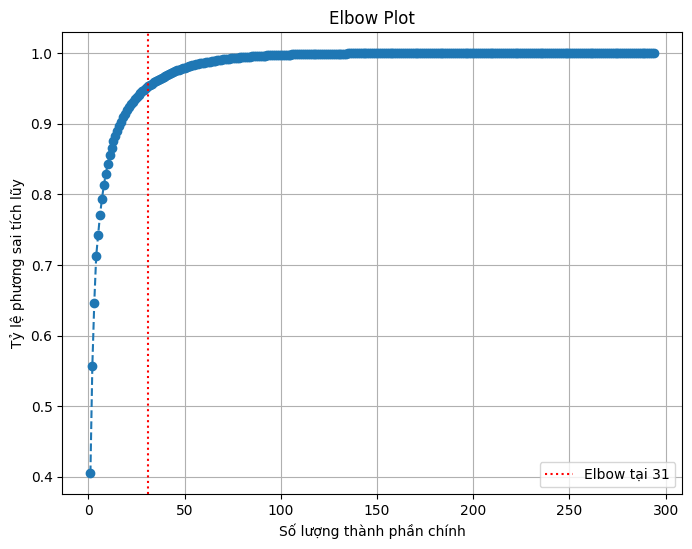

Elbow point được xác định là: 31 thành phần chính



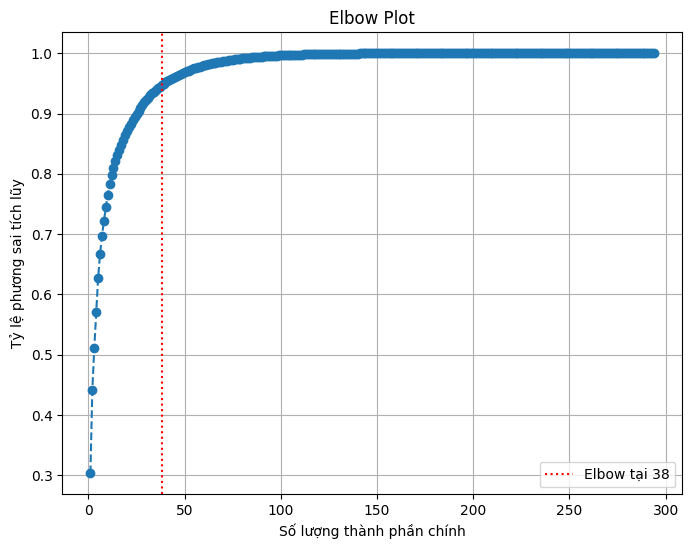

Elbow point được xác định là: 38 thành phần chính



In [ ]:
FPT_elbow_point = compute_elbow_point(FPT_after_analysis, 'FPT')
CMC_elbow_point = compute_elbow_point(CMC_after_analysis, 'CMC')

In [ ]:
def perform_pca(company_after_analysis, company_name):
    if company_name == 'FPT':
        n_components = FPT_elbow_point
    else:
        n_components = CMC_elbow_point

    columns = company_after_analysis.drop(columns=['Date']).columns
    X = company_after_analysis[columns]
    y = company_after_analysis[f'Close_{company_name}']

    scaler_X = MinMaxScaler(feature_range=(0, 1))
    scaler_y = MinMaxScaler(feature_range=(0, 1))

    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

    pca_model_X = PCA(n_components=n_components)
    X_pca = pca_model_X.fit_transform(X_scaled)

    pca_model_y = PCA(n_components=1)
    y_pca = pca_model_y.fit_transform(y_scaled)

    pca_result = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
    pca_result['Date'] = company_after_analysis['Date'].values
    pca_result['y_pca'] = y_pca

    return pca_result, scaler_X, scaler_y


In [ ]:
FPT_pca_result, FPT_scaler_X, FPT_scaler_y = perform_pca(FPT_after_analysis, 'FPT')

In [ ]:
CMC_pca_result, CMC_scaler_X, CMC_scaler_y = perform_pca(CMC_after_analysis, 'CMC')

In [ ]:
FPT_pca_result.to_csv('FPT_pca_result.csv', index=False)
CMC_pca_result.to_csv('CMC_pca_result.csv', index=False)

In [ ]:
import joblib

joblib.dump(FPT_scaler_X, '/content/FPT_scaler_X.pkl')
joblib.dump(FPT_scaler_y, '/content/FPT_scaler_y.pkl')

joblib.dump(CMC_scaler_X, '/content/CMC_scaler.pkl')
joblib.dump(CMC_scaler_y, '/content/CMC_scaler_y.pkl')

['/content/CMC_scaler_y.pkl']

In [ ]:
CMC_after_filter.to_csv('mmg_rough_filter.csv', index=False)
FPT_after_filter.to_csv('mmb_rough_filter.csv', index=False)

False
